In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
'''
Question 1
'''


def write_to_csv(array_of_df_objects, filename, indexname=None, header=False, index=False):
    '''
    Convenience function for writing dataframes to file
    :param array_of_df_objects: A list of dataframes, which will be concatenated and written to file
    '''
    if not array_of_df_objects:
        return
    df_to_csv = array_of_df_objects if isinstance(array_of_df_objects[0], pd.DataFrame) else [pd.DataFrame(df) for df in array_of_df_objects]
    df_to_csv = pd.concat(df_to_csv, axis=0)
    if indexname:
        df_to_csv.index.name = indexname
    df_to_csv.to_csv(filename + '.csv', header=header, index=index)

In [3]:
# Some useful constants for this assignment
N_examples = 2000
M = 20
test_set_percentage = 0.3

In [4]:
covariance_matrix = pd.read_csv(r'./Datasets/DS1_Cov.txt', header=None).drop([M], axis=1)
mean_1 = pd.read_csv(r'./Datasets/DS1_m_1.txt', header=None).drop([M], axis=1)
mean_0 = pd.read_csv(r'./Datasets/DS1_m_0.txt', header=None).drop([M], axis=1)

print(covariance_matrix.head())
print(mean_0.head())
print(mean_1.head())

         0         1         2         3         4         5         6   \
0  7.927476  5.488493  6.188124  5.177665  5.848031  6.153255  4.662317   
1  5.488493  6.815981  5.344910  4.310201  5.416452  5.539950  4.308112   
2  6.188124  5.344910  7.322937  4.873616  5.789942  6.606479  4.611756   
3  5.177665  4.310201  4.873616  5.770601  5.263125  4.504141  3.706669   
4  5.848031  5.416452  5.789942  5.263125  7.012392  5.391430  5.006798   

         7         8         9         10        11        12        13  \
0  5.455003  4.985743  5.187586  3.943640  5.261325  7.096371  5.998102   
1  3.936584  4.114292  4.984282  3.343938  4.590507  5.857147  5.077650   
2  4.839899  4.869057  5.053396  3.263445  4.681174  6.369132  5.172404   
3  4.398312  3.375699  4.205892  2.746950  4.171424  5.866059  4.787745   
4  4.380700  4.647594  5.115607  4.071011  4.992487  6.221683  5.830548   

         14        15        16        17        18        19  
0  6.093217  5.995185  5.873175  5

In [5]:
# Create the examples using the provided means and covariance matrix. Each class has 2000 examples
positive_class = pd.DataFrame(np.random.multivariate_normal(np.squeeze(mean_1), covariance_matrix, N_examples))
negative_class = pd.DataFrame(np.random.multivariate_normal(np.squeeze(mean_0), covariance_matrix, N_examples))

# Add the class column. This is useful for identifying the class an example belongs to after shuffling the data
positive_class[M] = 1
negative_class[M] = 0

print(positive_class.head())
print(negative_class.head())

         0         1         2         3         4         5         6   \
0  0.809510  0.762444  1.062931  3.277020  0.765378  2.298450  0.697927   
1  1.779756  6.607638  3.624538  1.863574  4.496233  3.985874  4.729293   
2  1.737792 -1.003644  1.890739  1.908453  1.364619  0.999664  1.890073   
3  0.649820 -0.575788  1.394863  1.460490  3.257944  2.242788  1.596227   
4  4.888319  5.877160  3.395796  4.246508  3.925181  4.806298  4.209107   

         7         8         9  ...        11        12        13        14  \
0  3.396996  1.173003  2.239404 ...  1.393394  1.315822  3.475368  0.323586   
1 -0.898812  3.838762  3.180341 ...  1.762760  1.492483  2.000010  4.253914   
2  0.376106  2.370084  2.069576 ... -0.186121  1.826915  0.367415  1.037387   
3  2.483983  0.439943  2.679983 ...  1.695602  1.294671  1.659185  1.068621   
4  6.855461  4.506156  7.467784 ...  6.029859  5.908627  5.316709  4.420045   

         15        16        17        18        19  20  
0  0.067804  1.9

In [6]:
# Shuffle the data
positive_class = positive_class.sample(frac=1).reset_index(drop=True)
negative_class = negative_class.sample(frac=1).reset_index(drop=True)
print(positive_class.head())

         0         1         2         3         4         5         6   \
0  5.799245  0.981582  3.648075  2.880938  1.386532  2.812113  2.337925   
1 -1.806263 -0.895121 -0.674817 -1.281003 -1.328922 -0.340342  0.143069   
2 -2.993128 -2.746520 -1.321603 -0.385646 -2.974827 -1.525190 -0.805270   
3 -1.751183  0.572418 -0.185178 -1.697590 -0.378909 -1.303696  0.476376   
4  3.739585  0.732089  1.209408  2.468928  1.960062  1.312623  1.802067   

         7         8         9  ...        11        12        13        14  \
0  6.114799  1.334466  2.161935 ...  1.814942  4.479677  2.536100  3.475979   
1 -0.947231 -0.196598 -2.135522 ... -1.005390 -2.425362 -1.575873 -0.126380   
2 -1.249584 -1.998816 -3.520853 ... -2.671507 -3.116386 -4.591016 -2.393289   
3 -0.900324 -0.459534 -0.906539 ... -1.460057 -4.349866  0.335505 -0.689001   
4  2.693402  4.066377  2.552505 ...  2.880892  1.868772  3.688049  2.098537   

         15        16        17        18        19  20  
0  2.881174  1.6

In [7]:
# Split up the data
test_pos = positive_class.iloc[:int(N_examples * test_set_percentage)]
test_neg = negative_class.iloc[:int(N_examples * test_set_percentage)]
train_pos = positive_class.iloc[int(N_examples * test_set_percentage):]
train_neg = negative_class.iloc[int(N_examples * test_set_percentage):]

print(test_neg.shape, test_pos.shape, train_neg.shape, train_pos.shape)

(600, 21) (600, 21) (1400, 21) (1400, 21)


In [8]:
# Write to file
write_to_csv([test_pos, test_neg], r'./Datasets/DS1_test')
write_to_csv([train_pos, train_neg], r'./Datasets/DS1_train')

In [9]:
'''
Question 2
'''
# Read in data from Q1
test_df = pd.read_csv(r'./Datasets/DS1_test.csv', header=None).astype(np.float64)
train_df = pd.read_csv(r'./Datasets/DS1_train.csv', header=None).astype(np.float64)
data = [train_df, test_df]

print(test_df.head())
print(train_df.head())
print(test_df.shape)
print(train_df.shape)

         0         1         2         3         4         5         6   \
0  5.799245  0.981582  3.648075  2.880938  1.386532  2.812113  2.337925   
1 -1.806263 -0.895121 -0.674817 -1.281003 -1.328922 -0.340342  0.143069   
2 -2.993128 -2.746520 -1.321603 -0.385646 -2.974827 -1.525190 -0.805270   
3 -1.751183  0.572418 -0.185178 -1.697590 -0.378909 -1.303696  0.476376   
4  3.739585  0.732089  1.209408  2.468928  1.960062  1.312623  1.802067   

         7         8         9  ...         11        12        13        14  \
0  6.114799  1.334466  2.161935 ...   1.814942  4.479677  2.536100  3.475979   
1 -0.947231 -0.196598 -2.135522 ...  -1.005390 -2.425362 -1.575873 -0.126380   
2 -1.249584 -1.998816 -3.520853 ...  -2.671507 -3.116386 -4.591016 -2.393289   
3 -0.900324 -0.459534 -0.906539 ...  -1.460057 -4.349866  0.335505 -0.689001   
4  2.693402  4.066377  2.552505 ...   2.880892  1.868772  3.688049  2.098537   

         15        16        17        18        19   20  
0  2.8811

In [10]:
# FUNCTIONS

def extract_lda_params(X):
    '''
    Finds the parameters of the LDA and returns them.
    :param X: The input data with label
    :return: The mean vectors, covariance matrix, pi, w0, w
    '''
    class_freq = X.groupby(20).size()
    # N0 is number of negative class data pts, N1 is number of positive class data pts (50/50 in this case)
    N0, N1 = class_freq.iloc[0], class_freq.iloc[1]
    pi = N1 / (N0 + N1)
    
    # Calculate the mean vectors
    mu_1 = X.loc[X[20] == 1].mean().drop(20)
    mu_0 = X.loc[X[20] == 0].mean().drop(20)

    # Calculate covariance matrix (equation from class notes)
    normalized_pos = X.loc[X[20] == 1].drop([20], axis=1) - mu_1
    normalized_neg = X.loc[X[20] == 0].drop([20], axis=1) - mu_0

    S1 = 1 / N1 * normalized_pos.T.dot(normalized_pos)
    S0 = 1 / N0 * normalized_neg.T.dot(normalized_neg)
    cov_matrix = 1 / (N1 + N0) * (N1 * S1 + N0 * S0)

    # Calclate w0 and w
    inv_cov = np.linalg.inv(cov_matrix.values)
    w = np.matmul(inv_cov, mu_1 - mu_0)
    w0 = -1 / 2 * (np.matmul(np.matmul(mu_1.values, inv_cov), mu_1.values) -
                   np.matmul(np.matmul(mu_0.values, inv_cov), mu_0.values)) + \
                   np.log(pi / (1 - pi))

    return mu_0, mu_1, cov_matrix, pi, w0, w


def sigmoid(val):
    '''
    Performs the sigmoid function on input.
    :param val: The input to be transformed
    :return: The sigmoid function applied to val
    '''
    return 1 / (1 + np.exp(-val))


def predict(X, w0, w):
    '''
    Uses the weights to make predictions on X
    :param X: The input (N examples with M features) 
    :param w0: Bias term
    :param w: The M-dimensional parameter vector
    :return: The predictions
    '''
    hypothesis_raw = sigmoid(np.matmul(X, w) + w0)
    hypothesis = [1 if val > 0.5 else 0 for val in hypothesis_raw]
    return hypothesis

def euclidean_dist(x, y):
    return np.linalg.norm(x - y)


def k_nearest_neighbors(train_x, train_y, test, k, testmode=False):
    if k & 1 == 0:
        k += 1
    train_x = train_x.values
    train_y = train_y.values
    test = test.values
    predictions = {}

    for i in range(len(test)):
        knn_list = [(train_y[j], euclidean_dist(train_x[j], test[i])) for j in range(len(train_x))]
        top_k = [pair[0] for pair in sorted(knn_list, key=lambda x: x[1])[:k]]
        top_k_cumsum = np.cumsum(top_k)
        # Basically, if we find k neighbors, we can calculate predictions for k from 1 to k - 1. This avoids
        # repeated computations and speeds up KNN for performance evaluation
        for neighbors in range(1 if testmode else k, k + 2, 2):
            if neighbors not in predictions:
                predictions[neighbors] = []
            predictions[neighbors].append(1 if top_k_cumsum[neighbors - 1] > neighbors - top_k_cumsum[neighbors - 1] else 0)

    return predictions


def score(y, h_y):
    '''
    Convenience function used to calculate accuracy, precision, recall and f-measure.
    :param y: The actual labels
    :param h_y: The predicted labels
    :return: The four metrics and the confusion matrix
    '''
    EPSILON = 1e-5

    # Accuracy
    accuracy = 0
    for i in range(len(h_y)):
        accuracy += 1 if abs(h_y[i] - y[i]) < EPSILON else 0
    accuracy /= len(h_y)

    # Confusion Matrix
    tp, fp, fn, tn = 0, 0, 0, 0
    for i in range(len(y)):
        if abs(h_y[i] - y[i]) < EPSILON:
            tp += 1 if y[i] == 1 else 0
            tn += 1 if y[i] == 0 else 0
        else:
            fp += 1 if y[i] == 1 else 0
            fn += 1 if y[i] == 0 else 0

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f_measure = 2 * precision * recall / (precision + recall)

    return accuracy,  precision, recall, f_measure, np.array([[tp, fp], [fn, tn]])


In [11]:
# LDA
mu_0, mu_1, cov_matrix, pi, w0, w = extract_lda_params(train_df)

prediction = predict(test_df.drop([20], axis=1), w0, w)
acc, precision, recall, f_measure, confusion = score(test_df[20], prediction)

print('LDA')
print('Confusion Matrix:', confusion)
print('Accuracy:', acc)
print('Precision:', precision)
print('Recall:', recall)
print('F-Measure:', f_measure)
print(w0)
print(w)

LDA
Confusion Matrix: [[573  27]
 [ 24 576]]
Accuracy: 0.9575
Precision: 0.955
Recall: 0.9597989949748744
F-Measure: 0.9573934837092732
-26.826149825448205
[-14.40077685   8.55242653   5.28337592   2.5913525    9.72230414
   4.13966706 -16.10570716  24.18588774  28.7332423   -9.29928164
  12.85403224  11.66027267 -15.14953982 -12.60728337   5.73668705
 -13.12195383 -28.55221437   6.85845758   0.04898055   5.18787534]


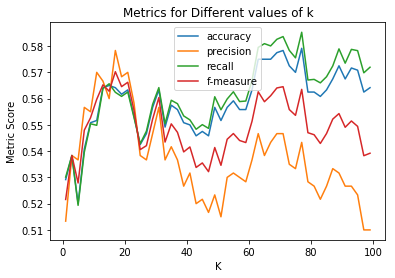

k value & Accuracy & Precision & Recall & F-Measure\\
1 &  0.52917 &  0.51333 &  0.53012 &  0.52159 \\
3 &  0.53833 &  0.53833 &  0.53833 &  0.53833 \\
5 &  0.52000 &  0.53667 &  0.51935 &  0.52787 \\
7 &  0.54083 &  0.55667 &  0.53958 &  0.54799 \\
9 &  0.55083 &  0.55500 &  0.55041 &  0.55270 \\
11 &  0.55167 &  0.57000 &  0.54984 &  0.55974 \\
13 &  0.56417 &  0.56667 &  0.56385 &  0.56525 \\
15 &  0.56500 &  0.56000 &  0.56566 &  0.56281 \\
17 &  0.56417 &  0.57833 &  0.56240 &  0.57025 \\
19 &  0.56167 &  0.56833 &  0.56086 &  0.56457 \\
21 &  0.56333 &  0.57000 &  0.56250 &  0.56623 \\
23 &  0.55333 &  0.55833 &  0.55281 &  0.55556 \\
25 &  0.54250 &  0.53833 &  0.54286 &  0.54059 \\
27 &  0.54667 &  0.53667 &  0.54762 &  0.54209 \\
29 &  0.55667 &  0.54667 &  0.55782 &  0.55219 \\
31 &  0.56333 &  0.55667 &  0.56419 &  0.56040 \\
33 &  0.54917 &  0.53667 &  0.55043 &  0.54346 \\
35 &  0.55750 &  0.54167 &  0.55938 &  0.55038 \\
37 &  0.55583 &  0.53667 &  0.55806 &  0.54715 \\
3

In [13]:
'''
Question 3
'''
# KNN
max_k = 99
accuracies = []
precisions = []
recalls = []
f_measures = []
best_accuracy = -999999
best_precision = -999999
best_recall = -999999
best_f = -999999
ks = [0, 0, 0, 0]
knn_pred = k_nearest_neighbors(train_df.drop([20], axis=1), train_df[20], test_df.drop([20], axis=1), max_k, True)
for k in range(1, max_k + 2, 2):
    acc, precision, recall, f_measure, confusion = score(test_df[20], knn_pred[k])
    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    f_measures.append(f_measure)

    if acc > best_accuracy:
        best_accuracy = acc
        ks[0] = k
    if precision > best_precision:
        best_precision = precision
        ks[1] = k
    if recall > best_recall:
        best_recall = recall
        ks[2] = k
    if f_measure > best_f:
        best_f = f_measure
        ks[3] = k

import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(np.arange(1, max_k + 2, 2), accuracies, label='accuracy')
plt.plot(np.arange(1, max_k + 2, 2), precisions, label='precision')
plt.plot(np.arange(1, max_k + 2, 2), recalls, label='recall')
plt.plot(np.arange(1, max_k + 2, 2), f_measures, label='f-measure')
plt.xlabel('K')
plt.ylabel('Metric Score')
plt.title('Metrics for Different values of k')
plt.legend()
plt.savefig('knn_q3')
plt.show()

all_res = [(k, accuracies[i], precisions[i], recalls[i], f_measures[i]) for i, k in enumerate(range(1, max_k + 2, 2))]

# Print for latex
print('k value', '&', 'Accuracy', '&', 'Precision', '&', 'Recall', '&', 'F-Measure' + '\\\\')
for tup in all_res:
    print(tup[0], '&', '% 0.5f' % tup[1], '&', '% 0.5f' % tup[2], '&', '% 0.5f' % tup[3], '&', '% 0.5f' % tup[4], '\\\\')

print(best_accuracy, best_precision, best_recall, best_f)
print(ks)

In [14]:
'''
Question 4
'''
test_set_percentage = 0.3
s1, s2, s3 = int(N_examples * .1), int(N_examples * .42), int(N_examples * .48)

# Read in data
ds2_cov1 = pd.read_csv(r'./Datasets/DS2_Cov1.txt', header=None).drop([M], axis=1)
ds2_cov2 = pd.read_csv(r'./Datasets/DS2_Cov2.txt', header=None).drop([M], axis=1)
ds2_cov3 = pd.read_csv(r'./Datasets/DS2_Cov3.txt', header=None).drop([M], axis=1)

ds2_c1_m1 = pd.read_csv(r'./Datasets/DS2_c1_m1.txt', header=None).drop([M], axis=1)
ds2_c1_m2 = pd.read_csv(r'./Datasets/DS2_c1_m2.txt', header=None).drop([M], axis=1)
ds2_c1_m3 = pd.read_csv(r'./Datasets/DS2_c1_m3.txt', header=None).drop([M], axis=1)

ds2_c2_m1 = pd.read_csv(r'./Datasets/DS2_c2_m1.txt', header=None).drop([M], axis=1)
ds2_c2_m2 = pd.read_csv(r'./Datasets/DS2_c2_m2.txt', header=None).drop([M], axis=1)
ds2_c2_m3 = pd.read_csv(r'./Datasets/DS2_c2_m3.txt', header=None).drop([M], axis=1)

print(ds2_cov1.head())

         0         1         2         3         4         5         6   \
0  5.592427  5.294967  5.086582  4.579155  3.803759  6.359199  3.840848   
1  5.294967  7.846542  6.270325  5.651894  5.358474  7.889640  5.333114   
2  5.086582  6.270325  6.857165  4.781657  4.953429  7.273465  4.979402   
3  4.579155  5.651894  4.781657  6.226809  3.938714  6.284273  3.936979   
4  3.803759  5.358474  4.953429  3.938714  5.436181  6.146399  4.048788   

         7         8         9         10        11        12        13  \
0  3.734163  4.479344  5.343580  3.998572  5.194316  5.667226  5.224760   
1  5.684451  5.741589  6.495811  5.523178  6.981197  6.320365  6.183729   
2  4.375227  5.613355  6.038735  4.782314  5.517563  5.918779  5.989552   
3  5.065501  4.873178  5.761432  4.350075  6.267773  5.084714  5.050038   
4  4.372347  4.162423  4.919871  3.483752  4.430448  5.244535  4.997809   

         14        15        16        17        18        19  
0  4.757244  5.066764  5.240470  3

In [15]:
# Generate class samples
data1_pos = np.random.multivariate_normal(np.squeeze(ds2_c1_m1), ds2_cov1, s1)
data1_neg = np.random.multivariate_normal(np.squeeze(ds2_c2_m1), ds2_cov1, s1)
data2_pos = np.random.multivariate_normal(np.squeeze(ds2_c1_m2), ds2_cov2, s2)
data2_neg = np.random.multivariate_normal(np.squeeze(ds2_c2_m2), ds2_cov2, s2)
data3_pos = np.random.multivariate_normal(np.squeeze(ds2_c1_m3), ds2_cov3, s3)
data3_neg = np.random.multivariate_normal(np.squeeze(ds2_c2_m3), ds2_cov3, s3)

# Aggregate the classes
positive_class = pd.DataFrame(np.concatenate((data1_pos, data2_pos, data3_pos)))
negative_class = pd.DataFrame(np.concatenate((data1_neg, data2_neg, data3_neg)))

# Set labels
positive_class[M] = 1
negative_class[M] = 0

# Shuffle data
positive_class = positive_class.sample(frac=1).reset_index(drop=True)
negative_class = negative_class.sample(frac=1).reset_index(drop=True)

# Split data
test_pos = positive_class.iloc[:int(N_examples * test_set_percentage)]
test_neg = negative_class.iloc[:int(N_examples * test_set_percentage)]
train_pos = positive_class.iloc[int(N_examples * test_set_percentage):]
train_neg = negative_class.iloc[int(N_examples * test_set_percentage):]

# Write to file
write_to_csv([test_pos, test_neg], r'./Datasets/DS2_test')
write_to_csv([train_pos, train_neg], r'./Datasets/DS2_train')

In [16]:
'''
Question 5
'''
# Read in DS2
test_df = pd.read_csv(r'./Datasets/DS2_test.csv', header=None).astype(np.float64)
train_df = pd.read_csv(r'./Datasets/DS2_train.csv', header=None).astype(np.float64)
data = [train_df, test_df]
print(test_df.shape, train_df.shape)

(1200, 21) (2800, 21)


In [20]:
# LDA
mu_0, mu_1, cov_matrix, pi, w0, w = extract_lda_params(train_df)

prediction = predict(test_df.drop([20], axis=1), w0, w)
acc, precision, recall, f_measure, confusion = score(test_df[20], prediction)

print('LDA')
print('Confusion Matrix:', confusion)
print('Accuracy:', acc)
print('Precision:', precision)
print('Recall:', recall)
print('F-Measure:', f_measure)
print(w0)
print(w)
print()

LDA
Confusion Matrix: [[319 281]
 [278 322]]
Accuracy: 0.5341666666666667
Precision: 0.5316666666666666
Recall: 0.5343383584589615
F-Measure: 0.5329991645781119
0.06778521423199102
[ 0.09214283  0.00292239 -0.01834667  0.02224508  0.01717231 -0.02159144
  0.09611934 -0.11333148  0.02888671 -0.02903803 -0.04746149 -0.00753071
 -0.09138599  0.00557748  0.03638741 -0.03275205 -0.05173444 -0.00352907
  0.01535743  0.03403121]



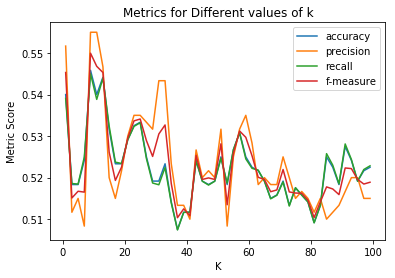

k value & Accuracy & Precision & Recall & F-Measure\\
1 &  0.54000 &  0.55167 &  0.53909 &  0.54530 \\
3 &  0.51833 &  0.51167 &  0.51858 &  0.51510 \\
5 &  0.51833 &  0.51500 &  0.51846 &  0.51672 \\
7 &  0.52417 &  0.50833 &  0.52496 &  0.51651 \\
9 &  0.54583 &  0.55500 &  0.54501 &  0.54996 \\
11 &  0.54000 &  0.55500 &  0.53883 &  0.54680 \\
13 &  0.54417 &  0.54667 &  0.54395 &  0.54530 \\
15 &  0.53167 &  0.52000 &  0.53242 &  0.52614 \\
17 &  0.52333 &  0.51500 &  0.52373 &  0.51933 \\
19 &  0.52333 &  0.52167 &  0.52341 &  0.52254 \\
21 &  0.52917 &  0.53000 &  0.52912 &  0.52956 \\
23 &  0.53250 &  0.53500 &  0.53234 &  0.53367 \\
25 &  0.53333 &  0.53500 &  0.53322 &  0.53411 \\
27 &  0.52500 &  0.53333 &  0.52459 &  0.52893 \\
29 &  0.51917 &  0.53167 &  0.51870 &  0.52510 \\
31 &  0.51917 &  0.54333 &  0.51828 &  0.53051 \\
33 &  0.52333 &  0.54333 &  0.52244 &  0.53268 \\
35 &  0.51417 &  0.52333 &  0.51391 &  0.51858 \\
37 &  0.50750 &  0.51333 &  0.50741 &  0.51036 \\
3

In [21]:
# KNN
max_k = 99
accuracies = []
precisions = []
recalls = []
f_measures = []
best_accuracy = -999999
best_precision = -999999
best_recall = -999999
best_f = -999999
ks = [0, 0, 0, 0]
knn_pred = k_nearest_neighbors(train_df.drop([20], axis=1), train_df[20], test_df.drop([20], axis=1), max_k, True)
for k in range(1, max_k + 2, 2):
    acc, precision, recall, f_measure, confusion = score(test_df[20], knn_pred[k])
    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    f_measures.append(f_measure)

    if acc > best_accuracy:
        best_accuracy = acc
        ks[0] = k
    if precision > best_precision:
        best_precision = precision
        ks[1] = k
    if recall > best_recall:
        best_recall = recall
        ks[2] = k
    if f_measure > best_f:
        best_f = f_measure
        ks[3] = k

import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(np.arange(1, max_k + 2, 2), accuracies, label='accuracy')
plt.plot(np.arange(1, max_k + 2, 2), precisions, label='precision')
plt.plot(np.arange(1, max_k + 2, 2), recalls, label='recall')
plt.plot(np.arange(1, max_k + 2, 2), f_measures, label='f-measure')
plt.xlabel('K')
plt.ylabel('Metric Score')
plt.title('Metrics for Different values of k')
plt.legend()
plt.savefig('knn_q5')
plt.show()

all_res = [(k, accuracies[i], precisions[i], recalls[i], f_measures[i]) for i, k in enumerate(range(1, max_k + 2, 2))]

# Print for latex
print('k value', '&', 'Accuracy', '&', 'Precision', '&', 'Recall', '&', 'F-Measure' + '\\\\')
for tup in all_res:
    print(tup[0], '&', '% 0.5f' % tup[1], '&', '% 0.5f' % tup[2], '&', '% 0.5f' % tup[3], '&', '% 0.5f' % tup[4], '\\\\')

print(best_accuracy, best_precision, best_recall, best_f)
print(ks)